# Energy model of AN in connnected channels

This notebook is for presenting important predictions by Woodhouse and Dunkel 2017.

The theory starts with a Hamiltonian
$$
H_0 = \lambda\sum_{e\in E} V(\phi_e) + \frac{1}{2}\mu\sum_{v\in V} (\mathbf{D}\cdot\mathbf{\Phi})_v^2
$$

The first term is the sum of double-well potential of channel flows, dictating flow in each channel to prefer $\pm 1$. The second term is a soft imcompressible constraint, stating that the accumulation at each vertices should be minimized. 
$$
V(\phi_e) = - \frac{1}{4}\phi_e^4 + \frac{1}{6}\phi_e^6
$$

## Visualize the double well potential

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython.display import clear_output
from myImageLib import FastPeakFind
from skimage import io, draw

In [11]:
def flow_potential(phi):
    """Flow potential of edge flow. Double well"""
    return - 1 / 4 * phi ** 4 + 1/6 * phi**6

(-1.65, 1.65, -0.13664062500000002, 0.669453125)

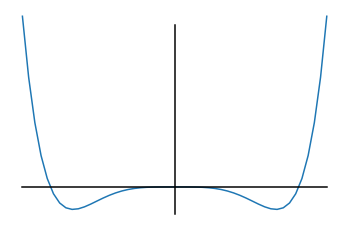

In [9]:
phi = np.linspace(-1.5, 1.5)
V = - 1 / 4 * phi ** 4 + 1/6 * phi**6
plt.plot(phi, V)
plt.plot([-1.5, 1.5], [0, 0], color="black")
plt.plot([0, 0], [-0.1, 0.6], color="black")
plt.axis("off")

## 3 way channels

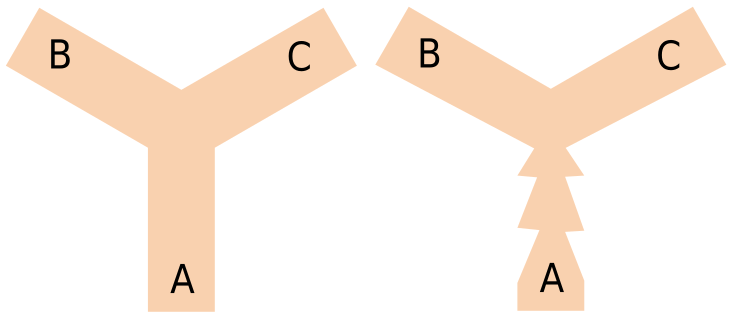

In [103]:
phi1 = np.linspace(-2, 2)
phi2 = np.linspace(-2, 2)
phi3 = np.linspace(-2, 2)
D = np.array([1, -1, -1])
a = 1 # lambda
b = 0.5 # mu
H = np.zeros((len(phi1), len(phi2), len(phi3)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        for k, p3 in enumerate(phi3):
            H[i, j, k] = a * (flow_potential(p1) + flow_potential(p2) + flow_potential(p3)) \
                            + 1/2 * b * np.sum(D * np.array([p1, p2, p3])**2)

In [104]:
flow_potential(-0)

0.0

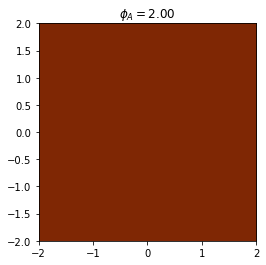

In [105]:
# show all the slices
norm = colors.Normalize(vmin=-0.4, vmax=1)
for i in range(50):
    plt.title("$\phi_A=${:.2f}".format(phi1[i]))
    plt.imshow(H[i], extent=(-2, 2, -2, 2), norm=norm, cmap="Oranges")
    plt.pause(.1)
    clear_output(wait=True)

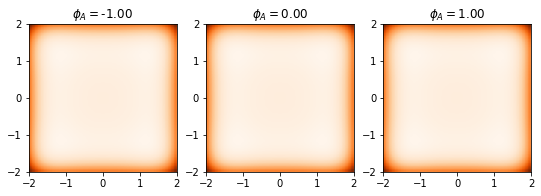

In [108]:
# show only 3 slices of H, where phi1 = -1, 0, 1
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
slice_number = [13, 25, 37]
phia = [-1, 0, 1]
for i in range(3):
    p = H[slice_number[i]]
    norm = colors.Normalize(vmin=p.min(), vmax=p.max())
    ax[i].imshow(p, extent=(-2, 2, -2, 2), norm=norm, cmap="Oranges")
    ax[i].set_title("$\phi_A=${:.2f}".format(phia[i]))

<font color="red">It is curious why only (1, -1) has a minimum, but not (-1, 1), since they are supposed to be equivalent (by symmetry). </font>

Let's look at the asymmetric configuration with a ratchet channel. Here, the ratchet channel should have fixed flow +1. 

In [96]:
phi2 = np.linspace(-2, 2)
phi3 = np.linspace(-2, 2)
D = np.array([1, -1, -1])
a = 1 # lambda
b = 1 # mu
H = np.zeros((len(phi2), len(phi3)))
for j, p2 in enumerate(phi2):
    for k, p3 in enumerate(phi3):
        H[j, k] = a * (flow_potential(1) + flow_potential(p2) + flow_potential(p3)) \
                        + 1/2 * b * np.sum(D * np.array([p1, p2, p3])**2)

In [97]:
(np.array([p1, p2, p3]) * D).sum()

-2.0

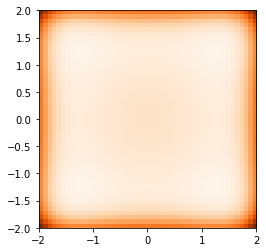

In [98]:
norm = colors.Normalize(vmin=H.min(), vmax=H.max())
plt.imshow(H, extent=(-2, 2, -2, 2), norm=norm, cmap="Oranges")

In [99]:
FastPeakFind(-H)

array([[ 0,  9,  9,  9, 40, 40],
       [40,  0,  9, 40,  9, 40]], dtype=int64)

## Boundary vertex Hamiltonian

Let's add some more ingredients to the Hamiltonian. The boundary vertices should be considered, because the whole system should conserve mass. This leads to the Hamiltonian for boundary vertices $\partial \Gamma$:
$$
H_{\partial\Gamma} = \frac{1}{2}\mu\sum_{v\in \partial \Gamma_{\text{in}}}[(\mathbf{D}\cdot\mathbf{\Phi})_v + I_v]^2
$$

Note that only the input vertices are constrained. Now, we use 
$$
H = H_0 + H_{\partial\Gamma}
$$
as the master Hamiltonian.

In [157]:
phi2 = np.linspace(-1.5, 1.5)
phi3 = np.linspace(-1.5, 1.5)
D = np.array([1, -1, -1])
a = 1 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2), len(phi3)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        for k, p3 in enumerate(phi3):
            H[i, j, k] = a * (flow_potential(1) + flow_potential(p2) + flow_potential(p3)) \
                            + 1/2 * b * ( np.sum(D * np.array([p1, p2, p3])) ** 2 + (-p1+1) ** 2 )

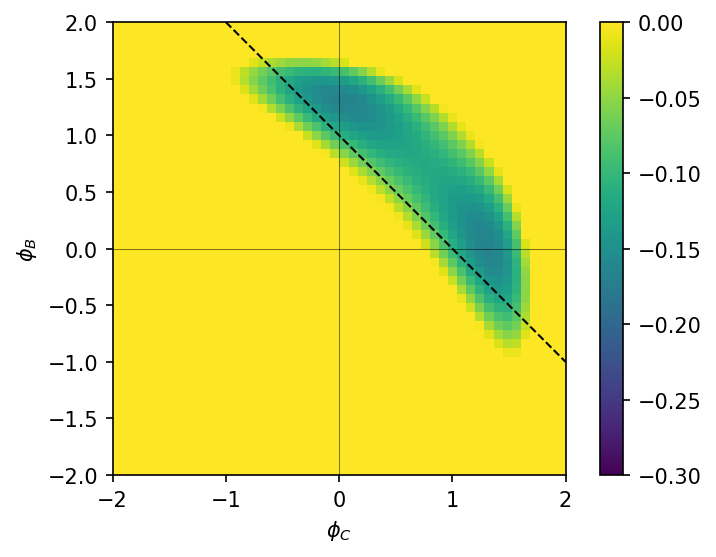

In [165]:
# show p1 = 1
norm = colors.Normalize(vmin=-0.3, vmax=0)
plt.figure(dpi=150)
plt.imshow(H[37], extent=(-2, 2, -2, 2), norm=norm, cmap="viridis", origin="lower") # it's important to set origin to "lower" to make probability map show properly
# plt.plot([-1, 2], [2, -1], color="black")
plt.xlabel("phi")
plt.plot([-2, 2], [0, 0], color="black", lw=0.5, alpha=0.5)
plt.plot([0, 0], [-2, 2], color="black", lw=0.5, alpha=0.5)
plt.plot([-1, 2], [2, -1], color="black", ls="--", lw=1)
plt.xlabel("$\phi_C$")
plt.ylabel("$\phi_B$")
plt.colorbar()

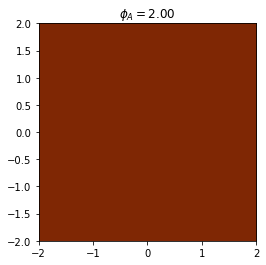

In [122]:
# show all the slices
norm = colors.Normalize(vmin=-3, vmax=1)
for i in range(50):
    plt.title("$\phi_A=${:.2f}".format(phi1[i]))
    plt.imshow(H[i], extent=(-2, 2, -2, 2), norm=norm, cmap="Oranges")
    plt.pause(.1)
    clear_output(wait=True)  

Text(0, 0.5, 'Energy')

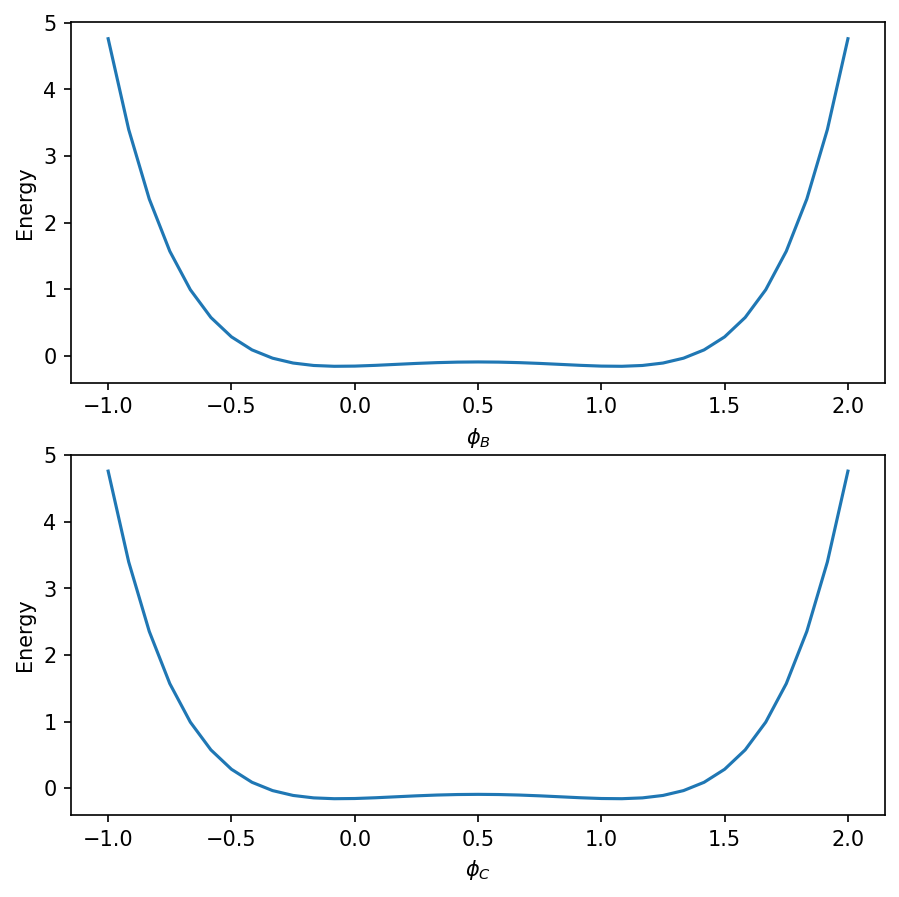

In [156]:
line_pixels = H[37][draw.line(48, 12, 12, 48)]
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(7, 7), dpi=150)
ax[0].plot(np.linspace(2, -1, len(line_pixels)), line_pixels)
ax[0].set_xlabel("$\phi_B$")
ax[0].set_ylabel("Energy")
ax[1].plot(np.linspace(-1, 2, len(line_pixels)), line_pixels)
ax[1].set_xlabel("$\phi_C$")
ax[1].set_ylabel("Energy")

In [154]:
line_pixels

array([[19.11788778, 16.97245029, 15.21215771, ...,  4.41665584,
         5.69714834,  7.36278574],
       [18.25605504, 16.12394533, 14.37698053, ...,  4.18122876,
         5.47504904,  7.15401422],
       [17.43597551, 15.31719359, 13.58355657, ...,  3.9875549 ,
         5.29470296,  6.98699592],
       ...,
       [10.99455794,  9.30226498,  7.99511692, ..., 17.59111858,
        19.32475561, 21.44353753],
       [12.31740612, 10.63844094,  9.34462066, ..., 19.54037243,
        21.28733723, 23.41944694],
       [13.98607022, 12.32043281, 11.03994031, ..., 21.83544219,
        23.59573477, 25.74117226]])

## Diode edge